In [285]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [2]:
def sum_logistic(x):
    return jnp.sum(1.0 / (1.0 + jnp.exp(-x)))

x_small = jnp.arange(3.)
derivative_fn = grad(sum_logistic)
print(derivative_fn(x_small))

[0.25       0.19661197 0.10499357]


In [3]:
def poly(x,y):
    return jnp.sum(x*x + x*y + x*x*y)

In [4]:
x = jnp.arange(-5,5,dtype = float)
y = jnp.arange(-5,5,dtype = float)

In [5]:
derivative_poly = grad(poly)

In [6]:
derivative_poly(x,y)

DeviceArray([35., 20.,  9.,  2., -1.,  0.,  5., 14., 27., 44.], dtype=float32)

## Some scikit-learn blobs

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0,cluster_std=0.25)

In [15]:
X.shape

(100, 2)

In [16]:
y.shape

(100,)

In [17]:
y

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

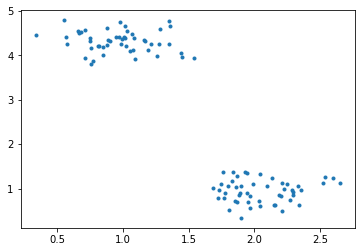

In [9]:
plt.plot(X[:,0],X[:,1],'.')

In [47]:
def blobLoss(centroidX,centroidY):
    
    return jnp.sum(jnp.sqrt(jnp.add(jnp.square(jnp.subtract(X[:,[0]], centroidX)), jnp.square(jnp.subtract(X[:,[1]], centroidY)))))

In [ ]:
jnp.add

In [11]:
jnp.asarray([[1,2]]).shape

(1, 2)

In [24]:
X[:,[1]].shape

(100, 1)

In [26]:
jnp.transpose(jnp.asarray([[0.1,0.2]])).shape

(2, 1)

In [28]:
X[:,[1]] - jnp.asarray([[0.1,0.2]])

DeviceArray([[1.1317956 , 1.0317956 ],
             [0.68820864, 0.5882087 ],
             [4.39816   , 4.29816   ],
             [3.7085884 , 3.6085882 ],
             [0.8768993 , 0.77689934],
             [3.8197265 , 3.7197263 ],
             [4.1569915 , 4.0569916 ],
             [1.1677923 , 1.0677923 ],
             [4.1282115 , 4.0282116 ],
             [0.6252762 , 0.52527624],
             [4.2428746 , 4.1428747 ],
             [0.73781884, 0.6378189 ],
             [4.447947  , 4.347947  ],
             [4.216774  , 4.116774  ],
             [0.9982778 , 0.8982778 ],
             [1.0337836 , 0.9337836 ],
             [0.52768075, 0.4276808 ],
             [4.113899  , 4.0138993 ],
             [0.6822675 , 0.5822675 ],
             [0.9324759 , 0.83247596],
             [4.298328  , 4.198328  ],
             [4.2178288 , 4.117829  ],
             [1.1834173 , 1.0834173 ],
             [4.428994  , 4.3289943 ],
             [0.7547771 , 0.6547771 ],
             [4.306437  ,

In [37]:
def blobLossBroadcast(centroidX,centroidY):
    
    return jnp.sum(jnp.sqrt(jnp.add(jnp.square(jnp.subtract(X[:,[0]], centroidX)), jnp.square(jnp.subtract(X[:,[1]], centroidY)))),axis = 0)

In [13]:
jnp.subtract(jnp.transpose(jnp.asarray([[1,2,3]])),jnp.transpose(jnp.asarray([1,2])))

DeviceArray([[ 0, -1],
             [ 1,  0],
             [ 2,  1]], dtype=int32)

In [14]:
blobLoss(0.5,1.5)

DeviceArray(226.62598, dtype=float32)

In [41]:
trialX = jnp.asarray([0.1,0.2,1.5])
trialY = jnp.asarray([0.1,0.2,2.0])

print(trialX.shape)
print(trialY.shape)

blobLossBroadcast(trialX,trialY)

(3,)
(3,)


DeviceArray([322.66986, 310.31793, 180.0839 ], dtype=float32)

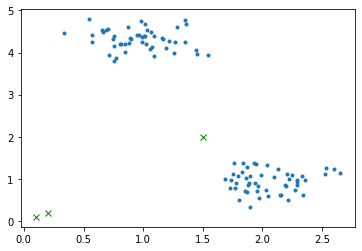

In [42]:
plt.plot(X[:,0],X[:,1],'.')
plt.plot(trialX,trialY,'x',color = 'green')

In [45]:
blobLossGrad = grad(blobLoss)

In [46]:
blobLossGrad(trialX,trialY)

TypeError: sub got incompatible shapes for broadcasting: (100,), (3,).

In [29]:
centroid = [0.,0.]

In [111]:
x = jnp.arange(0,3,0.1,dtype = float)
y = jnp.arange(0,3,0.1,dtype = float)

In [112]:
x

DeviceArray([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
             1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
             2.4, 2.5, 2.6, 2.7, 2.8, 2.9], dtype=float32)

In [113]:
y

DeviceArray([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
             1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
             2.4, 2.5, 2.6, 2.7, 2.8, 2.9], dtype=float32)

## Blob Loss Function Without Broadcasting

In [114]:
def blobLoss(centroidX,centroidY):
    
    diffX = jnp.subtract(X[:,[0]], centroidX)
    diffY = jnp.subtract(X[:,[1]], centroidY)
    
    print(diffX.shape)
    print(diffY.shape)
    
    print(centroidX.shape)
    print(centroidY.shape)
    
    print(X[:,[0]].shape)
    print(X[:,[1]].shape)
    
    return jnp.sum(jnp.sqrt(jnp.add(jnp.square(diffX), jnp.square(diffY))))

In [115]:
blobLossGrad = grad(blobLoss)

In [116]:
grads = blobLossGrad(jnp.transpose(x),jnp.transpose(y))

(100, 30)
(100, 30)
(30,)
(30,)
(100, 1)
(100, 1)


In [121]:
grads.shape

(30,)

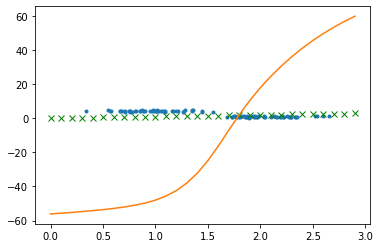

In [118]:
plt.plot(X[:,0],X[:,1],'.')
plt.plot(x,y,'x',color = 'green')

plt.plot(x,grads)

In [119]:
jnp.argmin(jnp.abs(grads))

DeviceArray(18, dtype=int32)

In [120]:
x[38],y[38]

(DeviceArray(2.9, dtype=float32), DeviceArray(2.9, dtype=float32))

In [260]:
def blobLossGrid(centroid):
    
    diffX = jnp.subtract(X[:,[0]], centroid[0])
    diffY = jnp.subtract(X[:,[1]], centroid[1])
    
    #print('centroid:',centroid)
    
    print(diffX.shape)
    print(diffY.shape)
    
    print(centroid[0].shape)
    print(centroid[1].shape)
    
    print(X[:,[0]].shape)
    print(X[:,[1]].shape)
    
    print(jnp.add(jnp.square(diffX), jnp.square(diffY)).shape)
    #print('sqrt',jnp.sqrt(jnp.add(jnp.square(diffX), jnp.square(diffY))).shape)
    
    finalSum = jnp.sum(jnp.sqrt(jnp.add(jnp.square(diffX), jnp.square(diffY))))
    
    print('sum',finalSum.shape)
    #print(finalSum)
    
    return finalSum

In [275]:
xy = jnp.mgrid[0.:5.:0.1, 0.:5.:0.1].reshape(2,-1).T

In [276]:
blobLossGridGrad = vmap(grad(blobLossGrid))

In [277]:
grads = blobLossGridGrad(xy)

(100, 1)
(100, 1)
()
()
(100, 1)
(100, 1)
(100, 1)
sum ()


In [233]:
grads

DeviceArray([[-56.100132, -69.46554 ],
             [-57.145206, -67.53551 ],
             [-58.14829 , -65.50505 ],
             ...,
             [ 59.74977 ,  12.667203],
             [ 59.78813 ,  14.370957],
             [ 59.90482 ,  16.111042]], dtype=float32)

In [266]:
xy[0:2]

DeviceArray([[0. , 0. ],
             [0. , 0.1]], dtype=float32)

In [268]:
grads = blobLossGridGrad(xy)

(100, 1)
(100, 1)
()
()
(100, 1)
(100, 1)
(100, 1)
sum ()


In [269]:
grads

DeviceArray([[-56.100132, -69.46554 ],
             [-57.145206, -67.53551 ],
             [-58.14829 , -65.50505 ],
             ...,
             [ 59.74977 ,  12.667203],
             [ 59.78813 ,  14.370957],
             [ 59.90482 ,  16.111042]], dtype=float32)

In [267]:
blobLossGrid(xy[0])

(100, 1)
(100, 1)
()
()
(100, 1)
(100, 1)
(100, 1)
sum ()


DeviceArray(335.16217, dtype=float32)

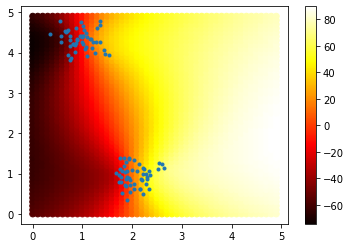

In [293]:
cmap = plt.cm.hot
norm = colors.Normalize(vmin=jnp.min(grads[:,0]), vmax=jnp.max(grads[:,0]))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(grads[:,0])))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.plot(X[:,0],X[:,1],'.')


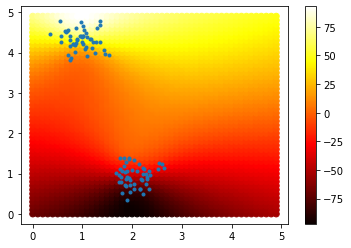

In [294]:
cmap = plt.cm.hot
norm = colors.Normalize(vmin=jnp.min(grads[:,1]), vmax=jnp.max(grads[:,1]))
plt.scatter(xy[:,0],xy[:,1], color=cmap(norm(grads[:,1])))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
plt.colorbar(sm)

plt.plot(X[:,0],X[:,1],'.')


ValueError: DeviceArray([-56.100132, -57.145206, -58.14829 , ...,  79.851326,
              79.20886 ,  78.5485  ], dtype=float32) is not a valid value for color

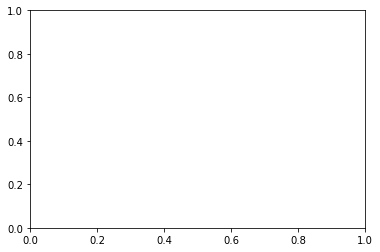

In [280]:
plt.plot(xy[:,0],xy[:,1],'.',color = grads[:,0])